In [1]:
%load_ext autoreload
%autoreload 2

from lib.data.datasets.GB1 import load_data, get_GB1_dataset

s:\Documents\master\ProGen\progen\progen2\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = load_data()
df

s:\Documents\master\ProGen\progen\progen2\.venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Variants,HD,Count input,Count selected,Fitness
0,VDGV,0,92735,338346,1.000000
1,ADGV,1,34,43,0.061910
2,CDGV,1,850,641,0.242237
3,DDGV,1,63,63,0.006472
4,EDGV,1,841,190,0.032719
...,...,...,...,...,...
149356,YYYR,4,203,1,0.001350
149357,YYYS,4,186,3,0.004421
149358,YYYT,4,181,14,0.021200
149359,YYYW,4,30,1,0.009136


Text(0.5, 1.0, 'Fitness distribution [1.0-max]')

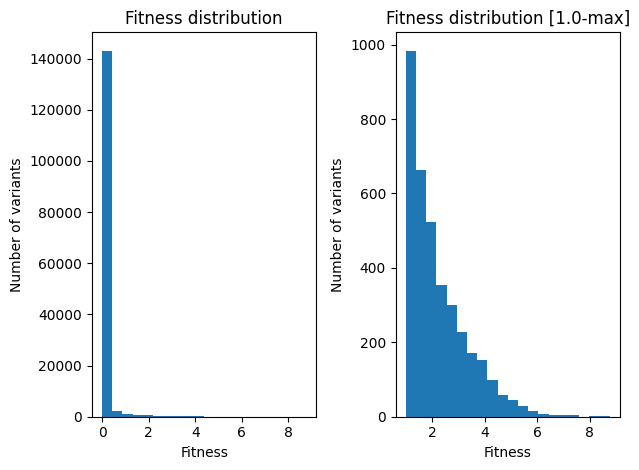

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

fitness = df["Fitness"].values
n_bins = 20
axs[0].hist(fitness, n_bins)
axs[0].set_xlabel("Fitness")
axs[0].set_ylabel("Number of variants")
axs[0].set_title("Fitness distribution")

fitness = fitness[fitness >= 1.0]
n_bins = 20
axs[1].hist(fitness, n_bins)
axs[1].set_xlabel("Fitness")
axs[1].set_ylabel("Number of variants")
axs[1].set_title("Fitness distribution [1.0-max]")

In [49]:
#df["Variants"]
#len(df)
df_bin = df.loc[(df["Fitness"] >= 1.0) & (df["Fitness"] < 2.0)]
df_bin[["Variants", "Fitness"]]

,Variants,Fitness
0,VDGV,1.000000
8,IDGV,1.445905
10,LDGV,1.690164
11,MDGV,1.170550
19,VCGV,1.838187
...,...,...
149163,YYLA,1.636589
149164,YYLC,1.801542
149178,YYLT,1.939304
149181,YYMA,1.578517


[145717   3644]


7288

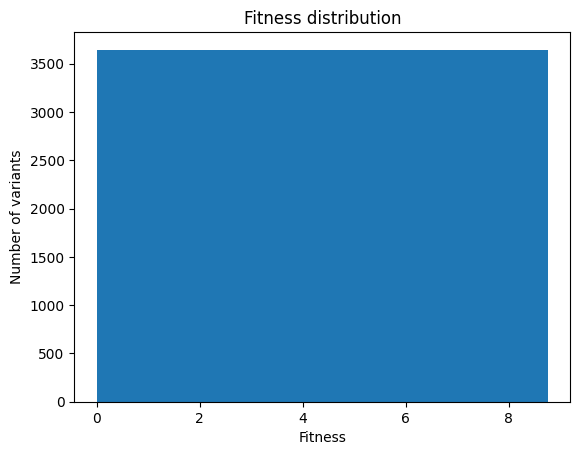

In [72]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

#df_improve = df.loc[df["Fitness"] >= 1.0]

counts, bins = np.histogram(df["Fitness"].values, bins=[0.0, 1.0, max(df["Fitness"])])
print(counts)

sampled_dfs = []
for i in range(len(bins)-1):
  if i == len(bins)-2:
    # last bin is inclusive on both sides
    df_bin = df.loc[(df["Fitness"] >= bins[i]) & (df["Fitness"] <= bins[i+1])]
  else:
    df_bin = df.loc[(df["Fitness"] >= bins[i]) & (df["Fitness"] < bins[i+1])]
  indexes = np.arange(0, len(df_bin))
  sampled_variants = df_bin.iloc[np.random.choice(indexes, np.amin(counts), replace=False)]
  sampled_dfs.append(sampled_variants)
resampled_df = pandas.concat(sampled_dfs)

fitness = resampled_df["Fitness"].values
#plot_n_bins = n_bins * 3
plt.hist(fitness, bins)
plt.xlabel("Fitness")
plt.ylabel("Number of variants")
plt.title("Fitness distribution")

len(resampled_df)

In [6]:
tmp = df.iloc[[0,3,37,49]]
tmp

,Variants,HD,Count input,Count selected,Fitness
0,VDGV,0,92735,338346,1.000000
3,DDGV,1,63,63,0.006472
37,VDGP,1,812,168,0.007556
49,VDNV,1,104,0,0.005746


In [7]:
tmp.drop([3, 49])

,Variants,HD,Count input,Count selected,Fitness
0,VDGV,0,92735,338346,1.000000
37,VDGP,1,812,168,0.007556


In [24]:
df.dtypes

Variants           object
HD                  int64
Count input         int64
Count selected      int64
Fitness           float64
dtype: object

In [5]:
df["Fitness"].values

array([1.        , 0.06190966, 0.24223728, ..., 0.02119982, 0.00913611,
       0.00961696])

In [19]:
(df["Fitness"] >= 1.0).values

array([ True, False, False, ..., False, False, False])

In [4]:
#len(df.loc[df["Fitness"] >= 6.0])
df.loc[df["Fitness"] >= 8.0]

,Variants,HD,Count input,Count selected,Fitness
57022,FWAA,4,63,2014,8.761966
57319,FYAA,4,221,6487,8.045152


In [1]:
import numpy as np

In [37]:
np.argmax(df["Fitness"])

57022

In [2]:
e = np.load("./../../data/ESM2_embeddings/test_embeddings.npy")

In [6]:
e.shape

(141864, 1280)

In [2]:
(
    sequences,
    fitnesses,
) = get_GB1_dataset(
    raw=True,
    filter_data=None,
    shuffle=True,
    n_data=None,
    device="cpu",
)

s:\Documents\master\ProGen\progen\progen2\.venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
sequences[0].count('A')

7